In [2]:
import pandas as pd
df = pd.read_excel('/Users/farrelmanazilin/Document/kuliah/data/quiz.xlsx')
df.head(5)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 24 columns):
 #   Column                                                                                                            Non-Null Count  Dtype 
---  ------                                                                                                            --------------  ----- 
 0   Nama lengkap                                                                                                      30 non-null     object
 1   Jurusan                                                                                                           30 non-null     object
 2   Program Studi                                                                                                     30 non-null     object
 3   Angkatan                                                                                                          30 non-null     int64 
 4   1. Saya merasa bahwa pembelajaran luring

In [3]:
dfq = df.drop(columns=['Nama lengkap', 'Jurusan', 'Program Studi', 'Angkatan'])

In [4]:
column_names = [f'x{i+1}' for i in range(len(dfq.columns))]
dfq.columns = column_names
dfq = dfq.drop('x1', axis=1)
column_names = [f'x{i+1}' for i in range(len(dfq.columns))]
dfq.columns = column_names

In [5]:
dfq

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19
0,4,4,2,4,2,4,2,4,2,4,5,3,2,4,4,3,4,4,3
1,4,4,2,4,4,5,4,2,1,3,4,3,4,3,3,4,4,3,4
2,2,4,2,3,4,5,2,3,4,4,4,3,5,2,2,5,3,4,5
3,3,5,3,5,4,5,2,4,3,4,5,4,5,3,4,4,5,4,5
4,4,2,4,5,5,4,4,4,5,4,2,4,5,1,3,4,4,3,2
5,2,3,1,4,5,5,3,3,2,4,4,3,4,1,2,5,5,5,5
6,4,1,3,3,3,3,4,1,5,5,5,3,4,3,1,3,3,3,3
7,4,2,4,1,3,4,3,2,4,4,4,2,3,4,2,4,4,4,4
8,2,4,3,5,5,4,4,5,3,3,4,2,4,1,1,4,4,2,4
9,3,3,2,4,4,4,3,3,3,4,4,3,5,3,3,4,4,2,4


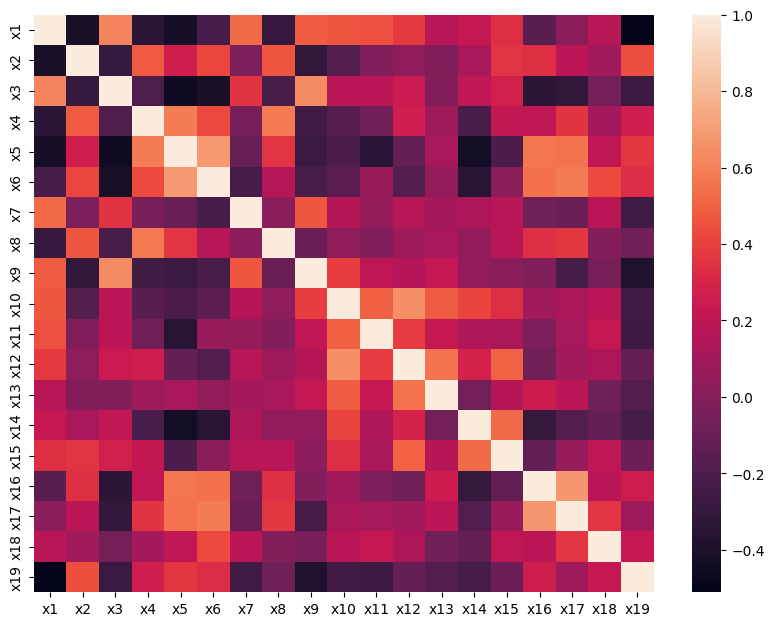

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix=dfq.corr()
fig = plt.figure(figsize=(10,7.5))
sns.heatmap(corr_matrix)
plt.show()

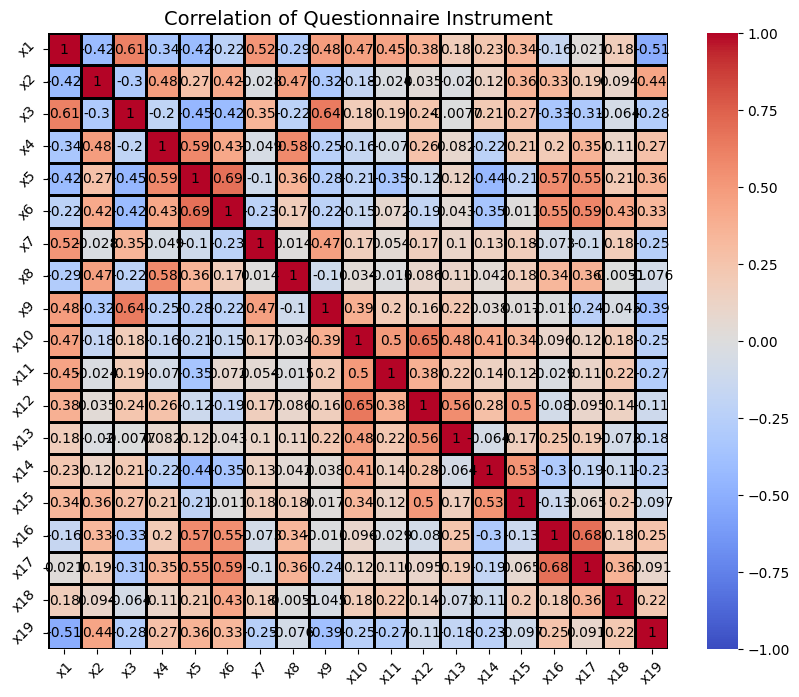

In [7]:
fig = plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix,
            cmap='coolwarm',
            linewidths=0.75,
            linecolor='black',
            cbar=True,
            vmin=-1,
            vmax=1,
            annot=True,
            annot_kws={'size': 10, 'color': 'black'})
plt.tick_params(labelsize=10, rotation=45)
plt.title('Correlation of Questionnaire Instrument', size=14)
plt.savefig("corr_quest.png")


In [8]:
import scipy.stats as stats

# Buat fungsi untuk menghitung korelasi dan menguji korelasi
def lwise_corr_pvalues(df, to_csv=False, file_name=None, method=None):
    df = df.dropna(how='any')._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    rvalues = dfcols.transpose().join(dfcols, how='outer')
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    length = str(len(df))
    
    if method is None:
        test = stats.pearsonr
        test_name = "Pearson"
    elif method == "spearman":
        test = stats.spearmanr
        test_name = "Spearman Rank"
    elif method == "kendall":
        test = stats.kendalltau
        test_name = "Kendall's Tau-b"
    
    for r in df.columns:
        for c in df.columns:
            rvalues[r][c] = round(test(df[r], df[c])[0], 4)
    
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = format(test(df[r], df[c])[1], '.4f')
    
    if not to_csv:
        print("Correlation test conducted using list-wise deletion",
              "\n",
              "Total observations used: ", length, "\n", "\n",
              f"{test_name} Correlation Values", "\n", rvalues, "\n",
              "Significant Levels", "\n", pvalues)
    if to_csv:
        print("Correlation test conducted using list-wise deletion",
              "\n",
              "Total observations used: ", length, "\n", "\n",
              f"{test_name} Correlation Values", "\n", rvalues, "\n",
              "Significant Levels", "\n", pvalues)
        file = open(file_name, 'a')
        file.write("Correlation test conducted using list-wise deletion" + "\n" + f"{test_name} correlation values" + "\n")
        file.write("Total observations used: " + length + "\n")
        file.close()
        rvalues.to_csv(file_name, header=True, mode='a')
        file = open(file_name, 'a')
        file.write("p-values" + "\n")
        file.close()
        pvalues.to_csv(file_name, header=True, mode='a')
lwise_corr_pvalues(dfq)

Correlation test conducted using list-wise deletion 
 Total observations used:  30 
 
 Pearson Correlation Values 
          x1      x2      x3      x4      x5      x6      x7      x8      x9   
x1      1.0 -0.4151  0.6108 -0.3355  -0.417  -0.224  0.5231 -0.2872  0.4833  \
x2  -0.4151     1.0 -0.2972  0.4792  0.2665  0.4181  -0.028  0.4686 -0.3159   
x3   0.6108 -0.2972     1.0 -0.2016  -0.452 -0.4155  0.3508 -0.2191  0.6389   
x4  -0.3355  0.4792 -0.2016     1.0  0.5857  0.4294 -0.0486  0.5759 -0.2484   
x5   -0.417  0.2665  -0.452  0.5857     1.0  0.6853 -0.1047  0.3572 -0.2791   
x6   -0.224  0.4181 -0.4155  0.4294  0.6853     1.0 -0.2264  0.1724 -0.2198   
x7   0.5231  -0.028  0.3508 -0.0486 -0.1047 -0.2264     1.0  0.0135  0.4686   
x8  -0.2872  0.4686 -0.2191  0.5759  0.3572  0.1724  0.0135     1.0 -0.1027   
x9   0.4833 -0.3159  0.6389 -0.2484 -0.2791 -0.2198  0.4686 -0.1027     1.0   
x10  0.4654 -0.1753  0.1819 -0.1586 -0.2093 -0.1501  0.1673  0.0336  0.3868   
x11  0.4481 -0.

In [9]:
import pingouin as pg
pg.cronbach_alpha(data=dfq)

(0.6501513532763532, array([0.439, 0.808]))

In [20]:
pg.cronbach_alpha(data=dfq, ci=.99)

(0.6501513532763532, array([0.353, 0.844]))

In [10]:
# Import required libraries
import pandas as pd
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [11]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(dfq)
chi_square_value, p_value

(324.04615850493, 1.490866226906619e-11)

In [12]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(dfq)
kmo_model

0.49172761530539805

In [13]:
from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer(n_factors=25, rotation=None)
fa.fit(dfq)
ev, v = fa.get_eigenvalues()
ev


array([5.11109898, 3.35214252, 1.98311766, 1.4437011 , 1.39483543,
       1.04799486, 0.88942759, 0.80923029, 0.6756022 , 0.59054122,
       0.48161441, 0.39082024, 0.22730367, 0.17575463, 0.14992555,
       0.10160214, 0.08722026, 0.05807042, 0.02999681])

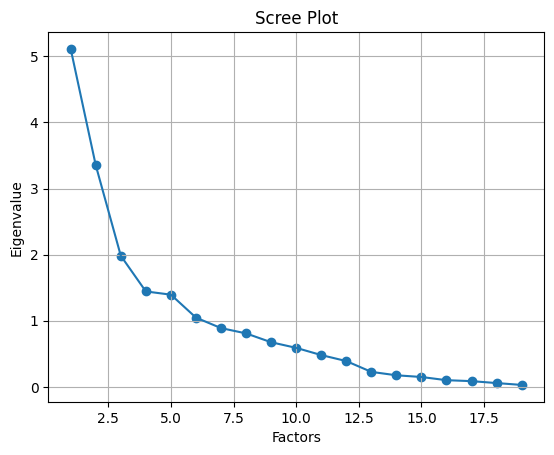

In [14]:
plt.scatter(range(1,dfq.shape[1]+1),ev)
plt.plot(range(1,dfq.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [15]:
fa = FactorAnalyzer(n_factors=2, rotation="varimax")

fa.fit(dfq)

loadings = fa.loadings_
loadings

array([[-0.32392032,  0.73799899],
       [ 0.52875173, -0.10695826],
       [-0.47683354,  0.46140386],
       [ 0.63451539, -0.05026482],
       [ 0.76402045, -0.30933345],
       [ 0.74248727, -0.16437063],
       [-0.14400871,  0.39543055],
       [ 0.49815693,  0.05171736],
       [-0.31515503,  0.47033507],
       [ 0.03906474,  0.78040511],
       [ 0.0059807 ,  0.52491727],
       [ 0.14453719,  0.71795787],
       [ 0.23004423,  0.45274849],
       [-0.23783924,  0.3683486 ],
       [ 0.11876929,  0.50536917],
       [ 0.66221289, -0.02190485],
       [ 0.72805514,  0.12284314],
       [ 0.33437737,  0.18823751],
       [ 0.35479568, -0.40447181]])

In [16]:
fa = FactorAnalyzer(n_factors=4, rotation="varimax")

fa.fit(dfq)

loadings = fa.loadings_
loadings

array([[-0.05511599,  0.94938182,  0.09023938,  0.08773402],
       [ 0.32868721, -0.44680346,  0.55677562, -0.0303576 ],
       [-0.34167184,  0.57602971,  0.10020675,  0.00326059],
       [ 0.43340316, -0.39557002,  0.32016933,  0.17918225],
       [ 0.71992933, -0.42366927, -0.1494747 ,  0.09078465],
       [ 0.8426654 , -0.16654624,  0.03320378, -0.13438728],
       [-0.0394422 ,  0.43197676,  0.11007145,  0.05959732],
       [ 0.28075964, -0.32648717,  0.27689556,  0.31257539],
       [-0.16439519,  0.56571085, -0.14083643,  0.21971819],
       [ 0.00751419,  0.49655144,  0.22269427,  0.57264681],
       [ 0.06801995,  0.43880747,  0.15587678,  0.22830769],
       [-0.01003772,  0.29737705,  0.44349468,  0.60045827],
       [ 0.13608487,  0.13696758, -0.01598067,  0.72032386],
       [-0.38441046,  0.17350267,  0.52512571,  0.09173121],
       [-0.00532426,  0.22258401,  0.83178021,  0.12301591],
       [ 0.68496311, -0.14260835, -0.13768916,  0.23290513],
       [ 0.75506417, -0.